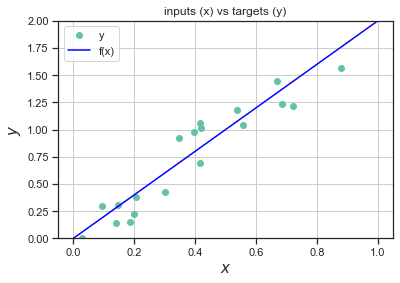

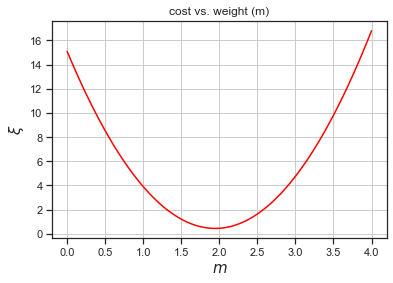

In [21]:
# do all of the imports here
import numpy  # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
from sklearn import datasets
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import math
from __future__ import division
numpy.random.seed(seed=1)

# Make up some data
x = numpy.random.uniform(0, 1, 20)
def f(x): return x * 2
noise_variance = 0.2  # Variance of the gaussian noise
noise = numpy.random.randn(x.shape[0]) * noise_variance
data = f(x) + noise
data

#Plot the data
#plt.plot(x, data, 'o', label='y')
#plt.xlabel('$x$', fontsize=15)
#plt.ylabel('$y$', fontsize=15)
#plt.ylim([0,2])
#plt.title('inputs (x) vs targets (y)')
#plt.grid()
#plt.legend(loc=2)
#plt.show()




#Draw a starting line. Not necessarily the best fit yet
plt.plot(x, data, 'o', label='y')
#'o' and 'b-' are defining the color
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.show()


#cost function
def nn(x, w):
    # multiply two variables
    return x * w

# A cost function for Linear Regression.
# cost = Sum of the distance squared between the data point and the line.
# That distance is known as the residual (fancy math term).
def cost(y, t):
    cost = ((t - y)**2).sum()
    return cost

#Plot the cost vs the given weight w (m, in our explanation)
ws = numpy.linspace(0, 4, num=100)  # weight values / 100 tries

# Collect a bunch of costs.
cost_ws = numpy.vectorize(lambda w: cost(nn(x, w) , data))(ws)  # cost for each weight in ws

# Plot
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$m$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('cost vs. weight (m)')
plt.grid()
plt.show()


m(0): 0.1000 	 cost: 13.6197
m(1): 0.2428 	 cost: 11.6602
m(2): 0.3745 	 cost: 9.9923
m(3): 0.4960 	 cost: 8.5725
m(4): 0.6081 	 cost: 7.3640
m(5): 0.7116 	 cost: 6.3354
m(6): 0.8070 	 cost: 5.4598
m(7): 0.8951 	 cost: 4.7145
m(8): 0.9763 	 cost: 4.0801
m(9): 1.0513 	 cost: 3.5400
m(10): 1.1204 	 cost: 3.0804
m(11): 1.1842 	 cost: 2.6891
m(12): 1.2431 	 cost: 2.3561
m(13): 1.2974 	 cost: 2.0726
m(14): 1.3475 	 cost: 1.8313
m(15): 1.3937 	 cost: 1.6259
m(16): 1.4363 	 cost: 1.4511
m(17): 1.4757 	 cost: 1.3023
m(18): 1.5120 	 cost: 1.1756
m(19): 1.5455 	 cost: 1.0678
m(20): 1.5764 	 cost: 0.9760
m(21): 1.6049 	 cost: 0.8979
m(22): 1.6312 	 cost: 0.8314
m(23): 1.6555 	 cost: 0.7747
m(24): 1.6778 	 cost: 0.7266
m(25): 1.6985 	 cost: 0.6856
m(26): 1.7176 	 cost: 0.6506
m(27): 1.7351 	 cost: 0.6209
m(28): 1.7514 	 cost: 0.5956
m(29): 1.7663 	 cost: 0.5741
m(30): 1.7801 	 cost: 0.5558
m(31): 1.7929 	 cost: 0.5402
m(32): 1.8046 	 cost: 0.5269
m(33): 1.8155 	 cost: 0.5156
m(34): 1.8255 	 cost: 

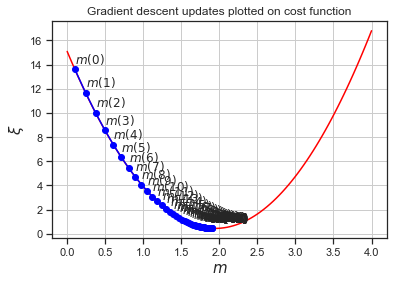

In [28]:
# Defining functions for gradiant descent

# define the gradient function. Remember that y = nn(x, w) = x * w
def gradient(w, x, t): 
    # Gradient descent uses a derivative to figure out
    # both the steepness of the slope, and the direction.
    # Yay Calculus!
    return 2 * x * (nn(x, w) - t)

# define the update function delta w
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

# Set the initial weight parameter
w = 0.1
# Set the learning rate
learning_rate = 0.01

# Start performing the gradient descent updates, and print the weights and cost:
nb_of_iterations = 50  # number of gradient descent updates
w_cost = [(w, cost(nn(x, w), data))] # List to store the weight,costs values
for i in range(nb_of_iterations):
    dw = delta_w(w, x, data, learning_rate)  # Get the delta w update
    w = w - dw  # Update the current weight parameter
    w_cost.append((w, cost(nn(x, w), data)))  # Add weight, cost to list

# Print the final w, and cost
for i in range(0, len(w_cost)):
    print('m({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))
    

    
# Plot the first gradient descent updates
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
# Plot the updates
for i in range(0, len(w_cost)-2):
    w1, c1 = w_cost[i]
    w2, c2 = w_cost[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$m({})$'.format(i)) 
# Show figure
plt.xlabel('$m$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.grid()
plt.show()